# Лабораторная работа №2
## Выполнил Смирнов Егор

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X = ((pd.read_csv('data.csv', header=None)).values)[:, 5:]
Y = X - X.mean(axis=0)[np.newaxis, :]
Z = Y/np.sqrt(np.sum(Y**2, axis=0))[np.newaxis, :]

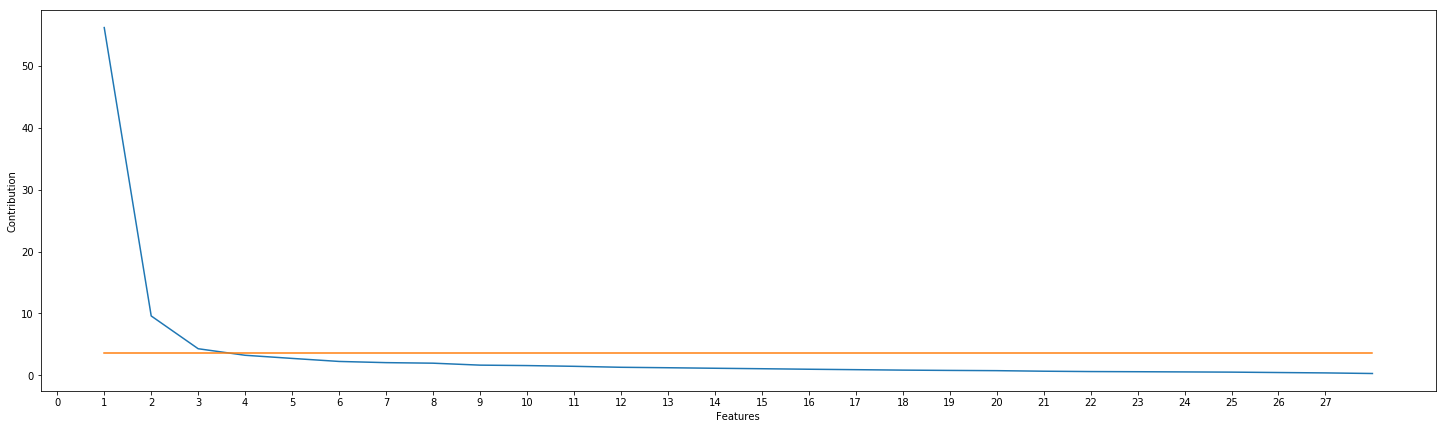

In [48]:
U, S, V = np.linalg.svd(Z, full_matrices=False)
V = V.T

S2 = S**2
SS = S2.sum()

plt.figure(figsize=(25, 7))
plt.plot(range(1, S2.shape[0] + 1), S2/SS*100)
plt.plot(range(1, S2.shape[0] + 1), np.ones(S2.shape[0])*np.mean(S2/SS*100))

plt.xlabel('Features')
plt.ylabel('Contribution')
plt.xticks(range(S2.shape[0]))

plt.show()

Была сделана попытка выбрать главными компоненты, чей вклад превышает средний, т.е. первые 3. Однако при интерпретации данных возникли сложности и в ходе перебора значений от трёх было выбрано 4, т.к. матрица корреляции приняла более очевидную форму(под воздействием поворотов).

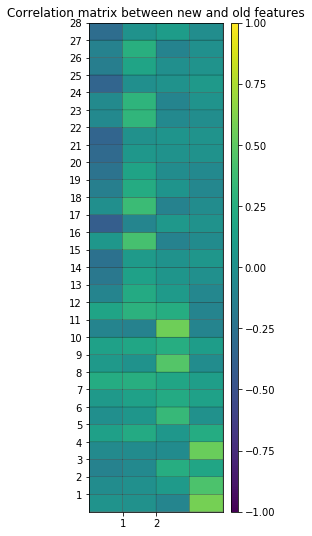

In [49]:
# function from https://en.wikipedia.org/wiki/Talk:Varimax_rotation
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p, k = Phi.shape
    R = np.eye(k)
    d = 0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u,s,vh = np.linalg.svd(np.dot(Phi.T, np.asarray(Lambda)**3 -\
                                      (gamma/p) * np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T, Lambda))))),\
                               full_matrices=False)
        R = np.dot(u,vh)
        d = np.sum(s)
        if d_old != 0 and d/d_old < 1 + tol: break
    return np.dot(Phi, R)

k = 4

fig, ax = plt.subplots(figsize=(3, 9))
im = ax.pcolor(varimax(V[:, :k]), cmap=cm.viridis, edgecolors='k', vmin=-1, vmax=1, linewidths=0.2)
ax.set_title('Correlation matrix between new and old features')
plt.yticks(range(1, S2.shape[0] + 1))
plt.xticks(range(1,3))

fig.colorbar(im, ax=ax, aspect=80)
plt.show()

Признаки:

1) Преподаватель опаздывал на пары.

2) Преподаватель предан своему делу и излагает материал в понятной форме.

3) Курс был полезен для моего профессионального роста.

4) Содержание курса, его цели, метод обучения и система оценки были представлены в начале курса.

4.102678571428571 4.0
4.888392857142857 5.0
4.785714285714286 5.0
4.5625 5.0


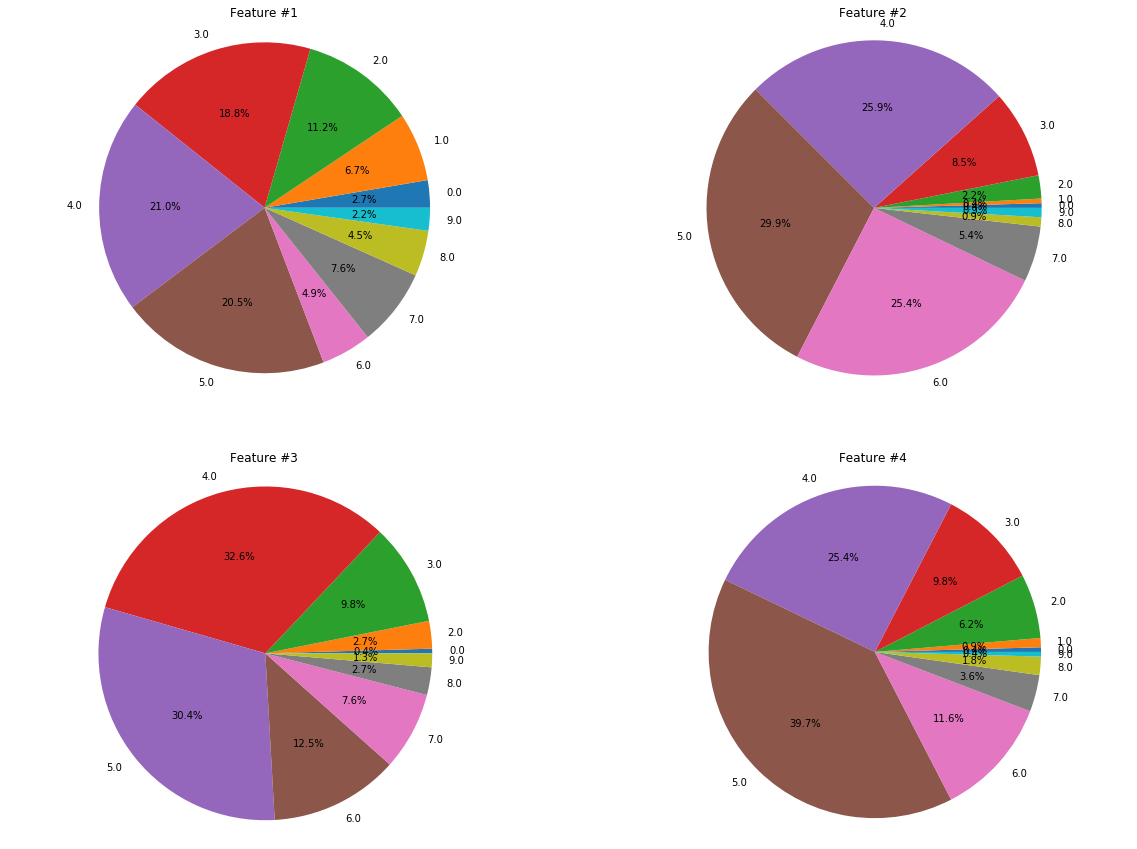

In [52]:
M = U[:, :k]
M_min = np.min(M, axis=0)[np.newaxis, :]
M_max = np.max(M, axis=0)[np.newaxis, :]
M = np.rint(9*(M-M_min)/(M_max-M_min))

fig1, ax = plt.subplots(ncols = int(k/2), nrows=int(k/2), figsize=(20, 15))

for i in range(int(k/2)):
    for j in range(int(k/2)):
        ind = int(i*k/2+j)
        ax[i, j].pie(np.unique(M[:, ind], return_counts=True)[1], labels=np.unique(M[:, ind]), autopct='%1.1f%%')
        ax[i, j].axis('equal')
        ax[i, j].set_title('Feature #' + str(ind+1))
        print(np.mean(M[:, ind]), np.median(M[:, ind]))

plt.show()

На диаграмах выше ответы студентов на новые вопросы в шкале от 0 до 9.

Если предполагать, что студенты отвечают честно, то получается, что преподавать иногда опаздывал на пары, материал преподаёт чуть лучше среднего, курс имел среднюю полезность, и половине студентов почему-то не предоставили содержание курса, его цели, метод обучения и систему оценки в его начале.

В общем и целом можно сказать, что это обычный курс у обычных студентов(или они просто поленились читать вопросы).